<a href="https://colab.research.google.com/github/wwjoon/k_means_clustering/blob/master/practice1_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI0026 Practice 1: K-means Clustering
The k-means clustering method is an unsupervised learning technique used to identify clusters of data in a dataset. A lot of clustering methods exist, but k-means clustering is one of the approachable methods. Unsupervised learning is the algorithm which treats unlabeled data. Unlabeled data do not have their own name so we can't classify them manually. To cluster the data properly, we need to go through a few steps.

Note: Make sure to sequentially run all the cells in each section, so that the intermediate variables / packages will carry over to the next cell

Have fun!

# Q1. Can you stack the data?
In this section, we will tranform our data's structure. The data is represented by  n x 1 matrix. We need to treat the data appropriately. In many instances, the error of the code results from the wrong data structure. To prevent this problem, we should use  matrix concatenation. In other words, it is called 'stack' 

# Device
You might need to use GPU for this Colab.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

First of all, the data can be stacked appropriately. Thus far, we can transform the data after the following import statement.

In [1]:
import numpy as np

The following usage is more useful.
#### Hint: vstack, hstack, dstack

In [4]:
####################################### 본 코드에 앞서 연습을 위한 셀입니다. ###############################################
X = [1,2,3,4,5]
Y = [6,7,8,9,10]
####### Your Code Here ##########
# (~2 line of code) 
# Write Row and Column seperately
# Row: makes the data stacking the direction of row
# Column: makes the data stacking the direction of column

Row = np.vstack([X, Y]) # 배열을 세로로 결합할 때 사용합니다, 요소(열) 개수가 일치해야 합니다.
Column = np.hstack([X, Y]) # 배열을 가로로 결합할 때 사용합니다, 요소 개수인 열을 일치하지 않아도 됩니다. 

##############################

print(X, Y, Row, Column, sep='\n\n') 

## There are another methods for concatenation in numpy libraray
## Try to np.c_[X,Y] and np.r_[X,Y]
## But commonly used methods are vstack, hstack and dstack.

[1, 2, 3, 4, 5]

[6, 7, 8, 9, 10]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

[ 1  2  3  4  5  6  7  8  9 10]


The next step is 'plot'. The visualization with the plot is a useful tool for checking the result. To use this tool, the following statement is needed.

# Can you visualize your data?

In [5]:
import matplotlib.pyplot as plt

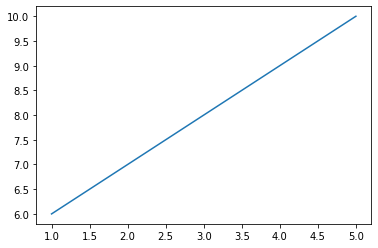

In [6]:
plt.plot(X,Y)

There is also helpful tool for visualization. It is called subplot. Subplot is used when you need to see many plots at the same time. So, you can compare the results easily and briefly.
A rule to use the subplot exist. Its grammar is almost same with normal plot. But there is a difference in the parentheses.


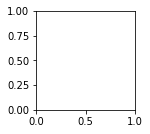

In [7]:
plt.subplot(2,3,1) 

First number of the parentheses means the number of column and the second one means row, the last one is an index number. In this rule, plt.subplot(2,3,1) eventually means that the 2x3 matrix of plot is constructed and the subplot is an (1,1) element.

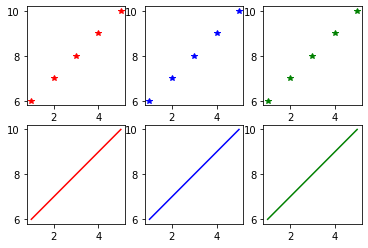

In [8]:
plt.subplot(2,3,1)
plt.plot(X,Y,'r*') ## * is a star marker, r = red, b = blue, g = green
plt.subplot(2,3,2)
plt.plot(X,Y,'b*')
plt.subplot(2,3,3)
plt.plot(X,Y,'g*')
plt.subplot(2,3,4)
plt.plot(X,Y,'r-') 
plt.subplot(2,3,5)
plt.plot(X,Y,'b-')
plt.subplot(2,3,6)
plt.plot(X,Y,'g-')


#  Q2. How to read the file stored outside the program?
The data is sotred in this address
"https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt".

There is a module named pandas. It's one of the most famous and useful modules. There are many types of data structures. One of them is called dataframe. It's the structure for storing 2-dimensional data. The dataframe in pandas includes data's name and index. In other words, the data are labeled. You can read the file stored outside by using 'pd.read_csv' grammar. You can use a following hint.
#### HINT: Use "pd.read_csv" method

In [9]:
import pandas as pd
dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt", sep = "\s+")
print(dfLoad)

            X         Y
0   -1.104990  0.948817
1   -0.306807  0.612625
2   -0.202678  0.658715
3   -0.214805  0.034105
4   -0.382061  1.303570
..        ...       ...
575 -1.408850  1.509450
576 -0.706832  0.284357
577 -0.279642 -0.062710
578 -1.184950  1.164200
579 -0.724035  1.325620

[580 rows x 2 columns]


The data file is uploaded in this github:"https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt". Parameter "sep = "\s+" " of pd.read_csv means that there is a blank between adjacent numbers in a row. For example, look at the index 1 data. X = -1.104990 and Y = 0.948817. There is a blank space between two values. So, you need to specify this blank and pd.read_csv with "sep = "\s+" " will take care of the spaces.

# Q3. Can you detach the data from given dataframe?

Here are NumPy and Pandas practices to prepare for implementing k-means clustering

In [13]:
####################################### 본 코드에 앞서 연습을 위한 셀입니다. ###############################################
import pandas as pd
import numpy as np

ipl_data ={'Team':['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
                  'Rank':[1,2,2,3,3,4,1,1,2,4,1,2], 
                  'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017], 
                  'Points':[879,789,863,673,741,812,756,788,694,701,804,690] }
###### Your Code Here #######
# (~2 line of code)
# use np.array
# ipl_data의 계열들(Team, Rank, Year, Points) 중 2개를 임의로 선택해 np.array로 변환하여 각각 ipl1과 ipl2에 할당합니다.

# ipl1 = np.array(ipl_data['Team'])
# ipl2 = np.array(ipl_data['Rank'])
ipl1 = np.array(ipl_data['Year'])
ipl2 = np.array(ipl_data['Points'])

##########################

print(ipl1)
print(ipl2)


[2014 2015 2014 2015 2014 2015 2016 2017 2016 2014 2015 2017]
[879 789 863 673 741 812 756 788 694 701 804 690]


Now we need to visualize it

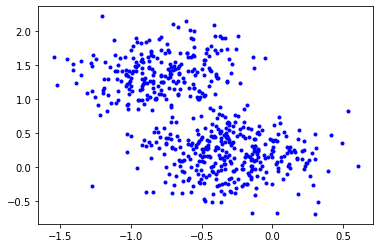

In [14]:
dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt", sep = "\s+")

####### Your Code Here #########

## (~2 lines of code)
## Note: Detach the data stored on the address which is given.
## "https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt".
## 여기서 선언해야 하는 변수의 이름 x와 y로 해주시기 바랍니다.
# Dataframe dfLoad의 두 column X와 Y를 각각 np.array로 만들어 변수 x와 y에 할당합니다.

x = np.array(dfLoad['X'])
y = np.array(dfLoad['Y'])

################################

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')


As shown in the chart, it seems difficult to classify these data points manually.

# Q4. How to initialize latent variables?
Latent Variable 이란 Centroid 와 같은 말입니다. 다음 셀에서 작성하셔야 할 코드는 Cluster에 해당하는 평균의 초기값을 잡는 것입니다. 이번 실습에서는 
k = 2인 k-means clustering을 진행할 것입니다. 즉 데이터들을 두 개의 cluster로 나눌 것이고 따라서 Centroid(Latent variable)도 2개가 필요한 것입니다. 
이때, 평균을 Centroid를 z0와 z1 이라고 선언하시면 됩니다. 

초기값을 잡는 컨셉은, 데이터들의 좌표와 너무 동떨어진 값을 초기값으로 하지 않으려고 가지고 있는 580개의 데이터들의 x좌표와 y좌표의 평균과 표준편차를 구한 후, 하나는 (평균) + (표준편차), 다른 하나는  (평균) - (표준편차)로 정해서 z0와 z1로 선언하는 것입니다.



(1, 2)
(1, 2)


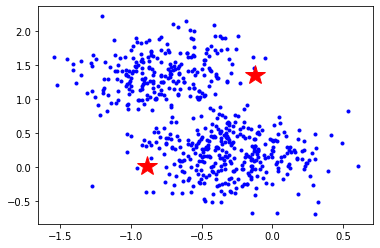

In [51]:
f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')
[mx, sx] = [np.mean(x), np.std(x)]
[my, sy] = [np.mean(y), np.std(y)]

####### Your Code Here ##########

## (~2 line of code)
# Note. reshape
# reshape을 써야하는 이유: 벡터를 array 형태로 저장했을 경우 size를 출력해보면 (n,1)이 아닌 (n, ) 로 뜹니다.
# 이럴경우 벡터의 연산이나 행렬의 연산이 불가능하다. 따라서 reshape을 통해[예시) .reshape(n,1)] 연산이 가능한 행렬, 벡터꼴로 만들어줘야 합니다.

z0 = np.array([mx-sx, my-sy])
z1 = np.array([mx+sx, my+sy])

z0 = z0.reshape(-1,2)
z1 = z1.reshape(-1,2)
print(z0.shape)
print(z1.shape)

#################################

Z = np.vstack([z0, z1])
ax1.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')

# Implement EM-Algorithm



### Hint: Use 'Groupby' method ###
![test](https://raw.githubusercontent.com/meaning-ful/kmenas-pseudo/main/Groupby.png)

In [54]:
####################################### 본 코드에 앞서 연습을 위한 셀입니다. ###############################################


## Groupby 
import pandas as pd
import numpy as np

ipl_data ={'Team':['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
                  'Rank':[1,2,2,3,3,4,1,1,2,4,1,2], 
                  'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017], 
                  'Points':[879,789,863,673,741,812,756,788,694,701,804,690] }
ipl_df = pd.DataFrame(ipl_data) 
####### Your Code Here ##########

## ( ~ 2 line of code)   
# Note: Sum of points by team
# Note:  ipl_df_groupby에 ipl_data를 “Team”으로 groupby를 해서 선언하면 됩니다
# Note: groupbySum은 groupby된 것을 통해  더하기 연산을 수행해주는 것입니다.
#ipl_df_groupby라는 것은 ipl_df를 groupby 함수를 이용해 dataframe을 변형시켜 할당해 놓은 것입니다.
#ipl_df_groupbySum은 Team으로 groupby해서 Team별 Points 합을 구한 것입니다.

# 이 부분에 관한 설명은 LMS 공지사항에 더 자세하게 설명이 되어 있으니 참고하시면 됩니다.

ipl_df_groupby = ipl_df.groupby(['Team'])
ipl_df_groupbySum = ipl_df_groupby.sum()

##############################
        


print(ipl_df, '\n')
print(ipl_df_groupby, '\n')
print(ipl_df_groupbySum)

      Team  Rank  Year  Points
0   Riders     1  2014     879
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690 


        Rank  Year  Points
Team                      
Devils     5  4029    1536
Kings      9  8062    3097
Riders     7  8062    3052
Royals     5  4029    1505


### Hint: Use 'np.linalg.norm' method ###


In [55]:
####################################### 본 코드에 앞서 연습을 위한 셀입니다. ###############################################

import numpy as np

ArrayforNorm = np.array([1, 3, 5, 7])
Norm1 = np.linalg.norm(ArrayforNorm, 1) ## Vector 1-norm
####### Your Code Here ##########

## Vector 2-norm
## Vectpr 3-norm
## norm 함수로 연습을 진행하는 이유는, 본 코드 진행시 Centroid를 update하는데 사용되기 때문입니다.

Norm2 = np.linalg.norm(ArrayforNorm, 2) ## Vector 1-norm
Norm3 = np.linalg.norm(ArrayforNorm, 3) ## Vector 1-norm

##############################
print(Norm1)
print(Norm2)
print(Norm3)

16.0
9.16515138991168
7.91578321936081


![test](https://raw.githubusercontent.com/meaning-ful/kmenas-pseudo/main/1.%20Psuedo%20Code.png)
EM 알고리즘은 2가지 Step을 iteration하면서 update하는 알고리즘입니다. 

step1) 군집의 초기 평균값 z0,z1으로 데이터를 clustering한다.

step2) clutering된 데이터들에서 각 cluster별로 평균을 다시 구해 z0,z1을 update한다.

step3) step1, step2 반복(iteration)

In [56]:
from locale import D_T_FMT
N = len(x)
numK = 2
## numK 는 cluster의 수입니다. 즉 k=2 인 clustering입니다.
## N = len(x) 이므로 N = 580이고 아래 for문을 통해 총 580번 iteration을 돌리기 위해 선언한 변수입니다.
samples = np.array(dfLoad)

k = np.zeros(N)
j = 0

# Step 1) while(True)
while(True):
    j += 1
    kOld = np.copy(k)
    ## kOld = k로 안 쓴 이유는 다음과 같습니다.
    ## 예)
    ## a = 2
    ## b = a
    ## a = a+2
    ## print(b)를 할경우 
    ## b = 2가 아닌 같이 update되서 b = 4가 출력이 된다.(np.array 특징)
    ## 이러면 step 3의 for문에 대해서 항상 True나오게 된다. (데이터를 백업하는게 아니라 주소를 따라가기 때문)
    ## 따라서 데이터만 백업하는 것이 copy이다.
    
# Step 2) for(i = 1 to N)
    for i in np.arange(N):
        ####### Your Code Here ##########
        
        ## ( ~ 2 line of code)
        ## z0D, z1D에서 D는 Distance(거리)입니다.
        ## 초반에 선언했던 변수 samples를 사용해야 합니다.
        ## EM 알고리즘 그림 아래 설명 부분을 참고해서 평균을 어떻게  update할 지 생각해 보시면 됩니다.
        
        z0D = np.linalg.norm(samples[i] - Z[0], 2)
        z1D = np.linalg.norm(samples[i] - Z[1], 2)

        #################################
        
        k[i] = z0D > z1D
# Step3) if(No change of mapping from prev. loop)break        
    if(np.alltrue(kOld == k)):
        break        
    # if(kOld == k)로 하면 오류가 납니다.
    # 그 이유는 모든 component들에 대해서 비교를 하는 것이 저 문법이 아니기 때문입니다.
    # 모든 component들에 대해서 비교를 하는 것은 np.alltrue(kOld == k) 입니다.
    
# Step4) for( j =1 to K)               
    dfCluster = pd.DataFrame(np.vstack([x, y, k]).T)
    
    ####### Your Code Here #########
    ## (~2 lines of code)
    
    ## Note: dfCluster를 dataframe 형태의 자료구조로 저장을 했으니 각 열(column)의 이름을 정해주시면 됩니다.->hint:  .columns
    #열의 이름은 편의를 위해 대문자 X,Y,K로 하시면 됩니다.
    
    ## Note: groupby를 해서 dfGroup으로 선언해주시면 됩니다.(열의 이름은 편의를 위해 대문자 X,Y,K로 하시면 됩니다.)
    # groupby를 할 때 data들을 clustering하는 것이고 같은 cluster가 되는 정보는 K 열에 할당이 되어있습니다.
    # 즉 data들이 0번 또는 1번 cluster에 들어간다라고 말해주는 것이 K입니다.
    # 따라서 K열로 groupby를 진행하시면 됩니다.

    dfCluster.columns = ['X', 'Y', 'K']
    dfGroup = dfCluster.groupby('K')

    ################################
    for cluster in range(numK):
        Z[cluster,:] = dfGroup.mean().iloc[cluster]
        ## df.Group.mean()는 각 cluster 별 mean들을 의미하고, 
        ## dfGroup.mean().iloc[cluster]는 “cluster” index에 해당하는 mean, 즉 한 cluster mean을 의미합니다.
        ## Z로 mapping된 data들을 cluster의 번호로 할당해주기 위함입니다.(그림참조)

# Visualization of Result

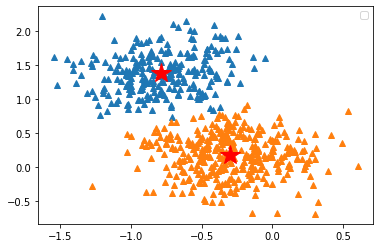

In [67]:
f2 = plt.figure(2)
ax2 = f2.add_subplot(111)
# ax2.plot(x, y, 'b.')
for (cluster, dataInCluster) in dfGroup:
    ####### Your Code Here #########
    
    ## (~1 lines of code)
    ## Note: for문에서 (cluster, dataInCluster)에서 cluster 는 앞의 셀에서 for문에 있는 cluster와 같은 것입니다.
    ## 즉, cluster의 인덱스 번호라고 생각하시면 됩니다.
    ## 따라서, p번째 cluster에서, dfGroup에 있는 데이터들을 dataInCluster에 저장하겠다는 것이고
    ## 이를 데이터들이 나와있는 plot에 같이 표시하게끔 코딩하시면 됩니다.
    
    ax2.plot(dataInCluster['X'], dataInCluster['Y'], '^')

    ################################
    #ax2.plot()

ax2.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')
ax2.legend()

# Final code

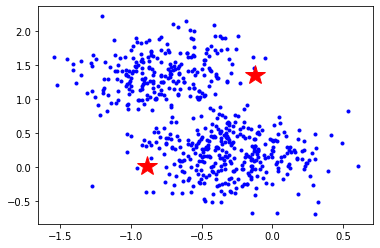

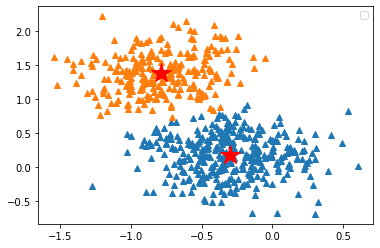

In [68]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd

plt.close("all")

dfLoad = pd.read_csv("https://raw.githubusercontent.com/meaning-ful/K-means/main/K-means.txt",  sep="\s+")

samples = np.array(dfLoad)
####### Your Code Here #########
## (~2 lines of code)

x = samples[:, 0]
y = samples[:, 1]

################################

N = len(x)
numK = 2

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x, y, 'b.')

mx, sx = np.mean(x), np.std(x)
my, sy = np.mean(y), np.std(y)
####### Your Code Here #########
## (~2 lines of code)

z0 = np.array([mx-sx, my-sy])
z1 = np.array([mx+sx, my+sy])

################################

Z = np.vstack([z0, z1])
ax1.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')

k = np.zeros(N)
j = 0

while(True):
    j += 1
    kOld = np.copy(k)
    for i in np.arange(N):

        ####### Your Code Here #########
        ## (~2 lines of code)

        z0D = np.linalg.norm(samples[i] - Z[0], 2)
        z1D = np.linalg.norm(samples[i] - Z[1], 2)

        ################################
        
        k[i] = z0D > z1D
    if(np.alltrue(kOld == k)):
        break
        
    dfCluster = pd.DataFrame(np.vstack([x,y,k]).T)
    ####### Your Code Here #########
    ## (~2 lines of code)

    dfCluster.columns = ['X', 'Y', 'K']
    dfGroup = dfCluster.groupby('K')

    ################################
    
    for cluster in range(numK):
        Z[cluster,:] = dfGroup.mean().iloc[cluster]


f2 = plt.figure(2)
ax2 = f2.add_subplot(111)

for (cluster, dataInCluster) in dfGroup:
    ####### Your Code Here #########
    ## (~1 lines of code)

    ax2.plot(dataInCluster['X'], dataInCluster['Y'], '^')

    ################################

ax2.plot(Z[:,0], Z[:,1], 'r*', markersize = '20')
ax2.legend()

# Submission
In order to get credit, you need to submit the ipynb file to LMS.

To get this file, click File and Download .ipynb. Please make sure that your output of each cell is available in your ipynb file.